<a href="https://colab.research.google.com/github/alexmal2804/hwds/blob/master/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22HW_lessons_9_10_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://colab.research.google.com/drive/1apH4vhupuMvttCAHUS5GQM4BK8auC7Ko?usp=sharing

# Домашнее задание

Ноутбук в колаб: https://colab.research.google.com/drive/1d-vvpJW8IWSPeodFnfaEVaZIQrys8uU0?usp=sharing

**Дедлайн: 01.01.2021, 23:59**


Формат отчетности - jupyter notebook. Однако вычислять производные не обязательно в Markdown. Если вычисляете вручную, то дополнительно с ноутбуком, отправляйте pdf-файл с расписанным решением.

### Пример реализации градиентного спуска: https://github.com/ddvika/Data-Science-School-2020/blob/main/lecture_9/gradient_methods.ipynb

# Задания

Перед выполнением ДЗ посмотрите на ноутбук, прикрепленный по ссылке выше. Там вы найдете реализацию градиентного спуска с постоянным и дробным шагом.

### Задание 1. [1 point]

Релизуйте градиентный спуск с постоянным шагом и с дробным шагом для функции
$$
y = x_{1}^{2}+5 x_{2}^{2}
$$

в произвольно выбранной Вами точке.

Поэксперементируйте с разными значениями шага (скорости обучения), попробуйте хотя бы по 2-3 разных значения.

### Задание 2. [3 points]

Для функции из предыдущего задания реализуйте градиентный спуск, в котором значение шага (скорости обучения) будет изменяться по формуле циклического косинусного ожига. ( в англ. литературе - cosine annealing learning rate или cosine decay lr). 

Доп. литература:
- Циклический косинусный отжиг https://habr.com/ru/post/332534/

- Пример colise decay в библиотеке Pytorch:
https://www.programmersought.com/article/12164650026/

### Задание 3. [0.75 point]
Проверьте работу Вашего градиентного спуска с косинусным отжигом на произвольной функции ( полином должен быть не меньше 3-ьего порядка и задан в пространстве не меньше $R^3$).

### Задание 4.
Случайная величина X задана следующей функцией распределения:
$$
f(x)=\left\{\begin{array}{r}
0 \text { npu } x \leq \pi \\
-\cos x \text { npu } \pi<x \leq \frac{3}{2} \pi \\
\text { 0 npu } x>\frac{3}{2} \pi
\end{array}\right.
$$

1. Постройте данную функцию распределения при помощи библиотеки seaborn **[0.25 point]**
2. Найдите плотность вероятности. **[1 point]**
3. Постройте график полученной плотности вероятности **[0.25 point]**

4. Определить вероятность попадания случайной величины X в интервал $\left[\pi, \frac{5}{4} \pi\right]$ **[0.75 point]**

5. Найти математическое ожидание и дисперсию случайной величины X . **[0.75 point]**

Так как мы не проходили интегрирование, то в 4 и 5 пунктах можете использовать
wolfram alpha (https://www.wolframalpha.com) для интегрирования. Однако 2ой пункт задания (на нахождение производной) должен быть расписан!

### Задание 5 [1.5 point]

 Случайная величина Х задана функцией распределения F(x).

 $$F(x)=\left\{\begin{array}{c}0, x \leq 1 \\ x-1,1<x \leq 2 \\ 1, x>2\end{array}\right.$$

 1. Является ли случайная величина Х непрерывной?

 2. имеет ли случайная величина Х плотность вероятности f(X)? Если имеет, найти ее. 
 3. постройте графики f(X) и F(X), если такое возможно.


### Задание 6

Рассмотрим несбалансированный набор данных с соотношением меньшего класса к большему 1: 100, где 100 экземпляров принадлежит меньшему классу, а 10 000 большему.

Модель ML делает прогнозы и предсказывает 120 примеров как принадлежащих к классу меньшинства, 90 из которых верны, а 30 - неверны.

Найти:

- Precision **[0.5 point]**
- Recall **[0.5 point]**
- $F_1$ метрику **[0.5 point]**

# Решения задач

### Задание 1. [1 point]
Релизуйте градиентный спуск с постоянным шагом и с дробным шагом для функции
$$
y = x_{1}^{2}+5 x_{2}^{2}
$$

в произвольно выбранной Вами точке.

Поэксперементируйте с разными значениями шага (скорости обучения), попробуйте хотя бы по 2-3 разных значения.

## Решение задачи 1:
$$
y = x_{1}^{2}+5 x_{2}^{2}
$$

Градиент функции равен $\nabla f= [2 \cdot x_1, 10 \cdot x_2]$.

Представим реализацию градиентного спуска в произвольно выбранной точке $x^{(0) }=(1,1)$:

In [ ]:
import numpy as np
import random as rnd
import math
import time
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def f(x):
    return x[0]**2 + 5*x[1]**2
    
def grad_f(x):
    return np.array([2*x[0], 10*x[1]])

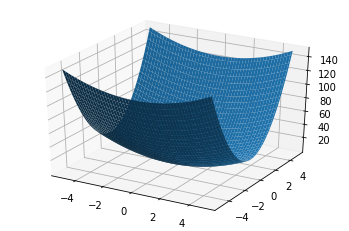

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

x, y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
z = x ** 2 + 5 * y ** 2

ax.plot_surface(x, y, z)

plt.show()

###Реализуем градиентный спуск с постоянным шагом, используя представленную преподавателем функцию:

In [ ]:
def grad_descent_const_step(x = np.array([1, 1]), alpha = 0.001, epsilon = 0.05):
    grad = grad_f(x)
    n = 0
    check = 0
    while (np.linalg.norm(grad) > epsilon) or (check < 3):
        x = x - alpha*grad
        grad = grad_f(x)
        n+=1
        if (np.linalg.norm(grad) <= epsilon): check +=1
    print("Градиентный спуск с постоянным шагом выполнил {} шагов".format(n))
    print("Точка с координатами х1 = {}, x2 = {}".format(x[0], x[1]))
    return x

In [ ]:
# Осуществим градиентный спуск с заданным по умолчанию для функции шагом 0.001 * grad:
x1 = grad_descent_const_step(x = [1, 1])

Градиентный спуск с постоянным шагом выполнил 1845 шагов
Точка с координатами х1 = 0.024879902563127755, x2 = 8.849811746717511e-09


In [ ]:
# Осуществим градиентный спуск с шагом 0.005 * grad:
x1 = grad_descent_const_step(alpha=0.005)

Градиентный спуск с постоянным шагом выполнил 370 шагов
Точка с координатами х1 = 0.02426733028783082, x2 = 5.724452510723783e-09


In [ ]:
# Осуществим градиентный спуск с шагом 0.0001 * grad:
x1 = grad_descent_const_step(alpha=0.0001)

Градиентный спуск с постоянным шагом выполнил 18445 шагов
Точка с координатами х1 = 0.024987765617576436, x2 = 9.670085817114161e-09


In [ ]:
# Осуществим градиентный спуск с шагом 0.01 * grad:
x1 = grad_descent_const_step(alpha=0.01)

Градиентный спуск с постоянным шагом выполнил 185 шагов
Точка с координатами х1 = 0.02381354235199539, x2 = 3.426606593921724e-09


###Реализуем градиентный спуск с дробным шагом:

In [ ]:
def grad_descent_step_splitting(x = np.array([1, 1]), alpha = 1, epsilon = 0.05, ksi = 0.5, lambda_d = 0.35):
    grad = grad_f(x)
    n = 0
    n_alpha = 0
    alpha_k = alpha
    x_k0 = x
    check = 0
    while np.linalg.norm(grad) > epsilon or check < 3:
        grad = grad_f(x_k0)
        x_k1 = x_k0 - alpha_k*grad
        while f(x_k1) - f(x_k0) > - alpha_k * ksi * (np.linalg.norm(grad)**2):
            alpha_k *= lambda_d
            x_k1 = x_k0 - alpha_k*grad
            n_alpha+=1
        x_k0 = x_k0 - alpha_k*grad
        alpha_k = alpha
        n+=1
        if (np.linalg.norm(grad) <= epsilon): check +=1
    x = x_k0
    print("Градиентный спуск с дроблением шага выполнил {} шагов".format(n))
    print("Выполнено {} итераций дробления шага".format(n_alpha))
    print("Точка с координатами х1 = {}, x2 = {}".format(x[0], x[1]))
    return x

In [ ]:
# Осуществим градиентный спуск c дробным шагом:
x2 = grad_descent_step_splitting()

Градиентный спуск с дроблением шага выполнил 13 шагов
Выполнено 27 итераций дробления шага
Точка с координатами х1 = 0.0034938588036157476, x2 = -0.000215883766723314


In [ ]:
x2 = grad_descent_step_splitting(lambda_d=0.01)

Градиентный спуск с дроблением шага выполнил 186 шагов
Выполнено 186 итераций дробления шага
Точка с координатами х1 = 0.023337271504955483, x2 = 3.0839459345295514e-09


In [ ]:
x2 = grad_descent_step_splitting(lambda_d=0.001)

Градиентный спуск с дроблением шага выполнил 1846 шагов
Выполнено 1846 итераций дробления шага
Точка с координатами х1 = 0.0248301427580015, x2 = 8.761313629250336e-09


In [ ]:
x2 = grad_descent_step_splitting(lambda_d=0.0001)

Градиентный спуск с дроблением шага выполнил 18446 шагов
Выполнено 18446 итераций дробления шага
Точка с координатами х1 = 0.02498276806445292, x2 = 9.660415731297047e-09


### Задание 2. [3 points]

Для функции из предыдущего задания реализуйте градиентный спуск, в котором значение шага (скорости обучения) будет изменяться по формуле циклического косинусного ожига. ( в англ. литературе - cosine annealing learning rate или cosine decay lr). 

## Решение задачи 2:

Напишем функцию, в которой градиентный спуск будет осуществляться с шагом, изменяющимся по формуле циклического косинусного отжига:

In [ ]:
# Уменьшение температуры на каждой итерации
def update_temperature(t, i):
  return  t*0.1/i

# Вычисление вероятности перехода
def get_probability(x1, x2, t):
  return math.exp(-1*(f(x2) - f(x1))/t)

# Определяем необходимость перехода
def transit(prob):
  r = False
  v = rnd.random()
  if prob > v:
    r = True
  return r

# Градиентный спуск с шагом, меняющимся по формуле циклического косинусного отжига
def grad_anneal_cosine (x = np.array([100, 100]), tmax= 500, tmin = 0.1):
    grad = grad_f(x)
    t = tmax
    i = 1 
    while (t >= tmin):
      x1 = x - update_temperature(tmax, i) * grad
      # если новое состояние обладает меньшим градиентом - осуществляем переход безусловно, 
      # если нет - осуществляем переход со случайно заданной вероятностью
      if transit(get_probability(x, x1, t)):
        grad = grad_f(x1)
        x = x1
      # настраиваем новую итеорацию
      t = t - update_temperature(tmax, i) 
      i += 1
      # print(i, t, x) 
    print("Градиентный спуск по методу циклического косинусного отжига выполнил {} шагов".format(i))
    print("Точка с координатами х1 = {}, x2 = {}".format(x[0], x[1]))
    return x
  

In [ ]:
x3 = grad_anneal_cosine()

Градиентный спуск по методу циклического косинусного отжига выполнил 12343 шагов
Точка с координатами х1 = 1.2956332369839438e-178, x2 = 0.0


### Задание 3. [0.75 point]
Проверьте работу Вашего градиентного спуска с косинусным отжигом на произвольной функции ( полином должен быть не меньше 3-ьего порядка и задан в пространстве не меньше $R^3$).

#Решение задачи 3:

Исследуем функцию: $$u = 4 \cdot x^3 + 2 \cdot y^2 + x \cdot y + z + 8$$ 
в точке $[0,0,0]$

In [ ]:
def f(x):
    return 4*x[0]**3 + 2*x[1]**2 + x[0]*x[1] + x[2] + 8
    
def grad_f(x):
    return np.array([12*x[0]**2 + x[0], 4*x[1] + x[0], 1])

In [ ]:
# Адаптируем функцию градиентного спуска по методу циклического косинусного отжига для функции трех  переменных
def grad_anneal_cosine (x = np.array([0, 0, 0]), tmax= 500, tmin = 0.1):
    grad = grad_f(x)
    t = tmax
    i = 1 
    while (t >= tmin):
      x1 = x - update_temperature(tmax, i) * grad
      # если новое состояние обладает меньшим градиентом - осуществляем переход безусловно, 
      # если нет - осуществляем переход со случайно заданной вероятностью
      if transit(get_probability(x, x1, t)):
        grad = grad_f(x1)
        x = x1
      # настраиваем новую итеорацию
      t = t - update_temperature(tmax, i) 
      i += 1
      # print(i, t, x) 
    print("Градиентный спуск по методу циклического косинусного отжига выполнил {} шагов".format(i))
    print("Точка с координатами х = {}, y = {}, z = {}".format(x[0], x[1], x[2]))
    return x

In [ ]:
# Осуществим градиентный спуск по методу циклического косинусного отжига:
t1 = time.time()
x1 = grad_anneal_cosine (x = [0, 0, 0])
print(time.time()-t1)

Градиентный спуск по методу циклического косинусного отжига выполнил 12343 шагов
Точка с координатами х = 0.0, y = 0.0, z = -499.9009767653991
0.17263484001159668


In [ ]:
# Осуществим градиентный спуск по методу циклического косинусного отжига в точке [0, 1, 2]
t1 = time.time()
x1 = grad_anneal_cosine (x = [0, 1, 2])
print(time.time()-t1)

Градиентный спуск по методу циклического косинусного отжига выполнил 12343 шагов
Точка с координатами х = 0.0, y = 0.0, z = -245.64622001592383
0.1525733470916748


### Задание 4.
Случайная величина X задана следующей функцией распределения:
$$
F(x)=\left\{\begin{array}{r}
0 \text { npu } x \leq \pi \\
-\cos x \text { npu } \pi<x \leq \frac{3}{2} \pi \\
\text { 0 npu } x>\frac{3}{2} \pi
\end{array}\right.
$$

1. Постройте данную функцию распределения при помощи библиотеки seaborn **[0.25 point]**
2. Найдите плотность вероятности. **[1 point]**
3. Постройте график полученной плотности вероятности **[0.25 point]**

4. Определить вероятность попадания случайной величины X в интервал $\left[\pi, \frac{5}{4} \pi\right]$ **[0.75 point]**

5. Найти математическое ожидание и дисперсию случайной величины X . **[0.75 point]**

## Решение задачи 4:

In [ ]:
# 1. Построим график функции распредления
def fr(x):
  return 0 if x <= math.pi or  x > 3 * math.pi / 2  else - math.cos(x)
n = 12

data_fr = np.array([fr(i * math.pi / 24) for i in range(-n, 4 * n)])

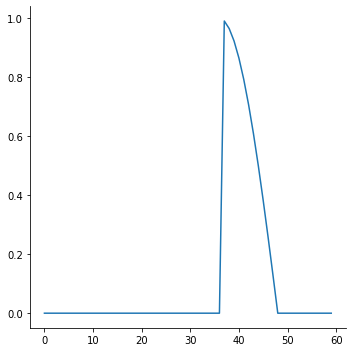

In [ ]:
sns.relplot(data=data_fr, kind='line');

2. Найдем плотность вероятности

$$
f(x)= F^{'}(x)=\left\{\begin{array}{r}
0^{'} \text { npu } x \leq \pi \\
-\cos^{'} x \text { npu } \pi<x \leq \frac{3}{2} \pi \\
  0^{'}\text { npu } x>\frac{3}{2} \pi
\end{array}\right. = 
\left\{\begin{array}{r}
0\text { npu } x \leq \pi \\
\sin x \text { npu } \pi<x \leq \frac{3}{2} \pi \\
  0\text { npu } x>\frac{3}{2} \pi
\end{array}\right.
$$ 

In [ ]:
# 3. Построим график плотности вероятности
def fp(x):
  return 0 if x <= math.pi or  x > 3 * math.pi / 2  else math.sin(x)
n = 12

data_fp = np.array([fp(i * math.pi / 24) for i in range(-n, 4 * n)])

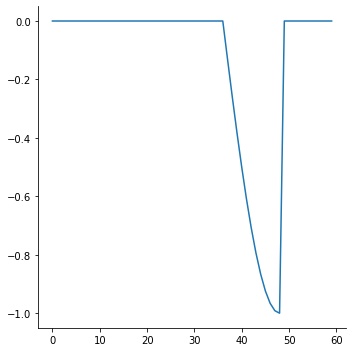

In [ ]:
sns.relplot(data=data_fp, kind='line');

4. Определить вероятность попадания случайной величины X в интервал $\left[\pi, \frac{5}{4} \pi\right]$

$P(\pi < X < \frac{5}{4} \pi) = F(\frac{5}{4}  \pi) - F(\pi) = - cos \frac{5}{4} \pi - 0 = \frac{\sqrt 2}{2} \approx 0,707. $

5. Найдем мат. ожидание:

$M(X) = \int_{- \infty}^{+\infty} x \cdot f(x) dx = \int_{\pi}^{\frac{3}{2}\pi} x  sin (x) dx $

$u = x \Rightarrow du = dx$

$dv = sin(x)dx \Rightarrow v = -cos(x)$

$M(X) = - x \cdot cos(x) + sin(x)\bigg|_{\pi}^{\frac{3}{2}\pi} = -1 - \pi \approx - 4,14$

6. Найдем дисперсию

$D(X) = \int_{- \infty}^{+\infty} x^{2} \cdot f(x) dx - M(X) = \int_{\pi}^{\frac{3}{2}\pi} x^{2}  sin (x) dx $

$u = x^{2} \Rightarrow du = 2xdx$

$dv = sin(x)dx \Rightarrow v = -cos(x)$

$D(X) =  - (x^{2}- 2) \cdot cos(x) + 2 \cdot x \cdot sin(x) \bigg|_{\pi}^{\frac{3}{2}\pi} = 2 - 3 \pi - \pi^{2} \approx -17,29$

## Задание 5

 Случайная величина Х задана функцией распределения F(x).

 $$F(x)=\left\{\begin{array}{c}0, x \leq 1 \\ x-1,1<x \leq 2 \\ 1, x>2\end{array}\right.$$

 1. Является ли случайная величина Х непрерывной?

 2. имеет ли случайная величина Х плотность вероятности f(X)? Если имеет, найти ее. 
 3. постройте графики f(X) и F(X), если такое возможно.

## Решение задачи 5:

1. Т.к. велчина задана в виде функции распределения и $F(x)$ непрерывно изменяется на интервале от 1 до 2, то случайая величина X является непрерывной.

2. $f(x) = F^{'}(x) = (x-1)^{'} = 1$. Т.к. производная для $F(x)$ определена, то случайная величина X имеет плотность вероятности

In [ ]:
# 3. Построим график функции распредления
def fr1(x):
  return 0 if x <= 1 else 1 if x > 2  else x - 1
n = 100

data_fr1 = np.array([fr1(i/n) for i in range(-4 * n, 4 * n)])

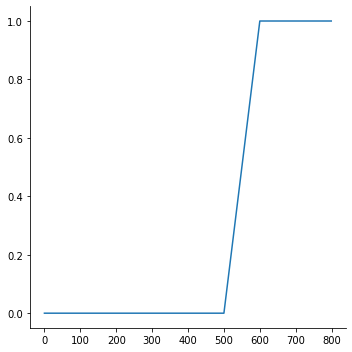

In [ ]:
sns.relplot(data=data_fr1, kind='line');

In [ ]:
# 3. Построим график плотности вероятности

data_fp1 = np.array([1 for i in range(-4 * n, 4 * n)])

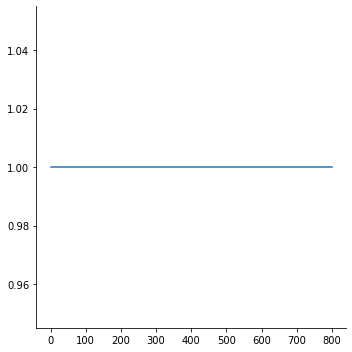

In [ ]:
sns.relplot(data=data_fp1, kind='line');

### Задание 6

Рассмотрим несбалансированный набор данных с соотношением меньшего класса к большему 1: 100, где 100 экземпляров принадлежит меньшему классу, а 10 000 большему.

Модель ML делает прогнозы и предсказывает 120 примеров как принадлежащих к классу меньшинства, 90 из которых верны, а 30 - неверны.

Найти:

- Precision **[0.5 point]**
- Recall **[0.5 point]**
- $F_1$ метрику **[0.5 point]**

## Решение задачи 6:

Построим матрицу ошибок классификации:

\begin{array}{|c|c|c|}
\hline
  & y_{1} & y_{2} \\ \hline
\widehat{y}_{1} & TP = 90  & FP =30 \\ \hline
\widehat{y}_{2} & FN = 10 & TN = 9970 \\ \hline
\end{array}

$precision = \frac{TP}{TP+FP} = \frac{90}{90+30}= 0,75.$

$recall = \frac{TP}{TP+FN} = \frac{90}{90+10}=0,9.$

$F_{\beta} = (1+\beta^{2}) \cdot \frac{precision \cdot recall}{\beta^{2} \cdot precision + recall}$

При $\beta=1$ получим:

$F_1= 2 \cdot \frac{0,75 \cdot 0.9}{0.75+0.9}= 0.818.$
